In [1]:
library(randomForest)
library(caret)


data <- read.csv("../../data/processed/trained_cleaned.csv")
head(data)


# Explore the structure of the data
str(data)



randomForest 4.6-14



Type rfNews() to see new features/changes/bug fixes.

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,19114.12,3,4,3,4,5,4,6.27,4,809.98,49.57495,268,2,2,7,115.7114,0.04237600,0.5714286
2,19114.12,3,4,3,4,6,0,11.27,4,809.98,49.57495,269,2,2,7,115.7114,0.04237600,0.0000000
3,19114.12,3,4,3,4,3,8,11.27,4,809.98,49.57495,271,2,2,7,115.7114,0.04237600,1.1428571
4,19114.12,3,4,3,4,3,6,11.27,4,809.98,49.57495,0,1,2,7,115.7114,0.04237600,0.8571429
5,34847.84,2,4,6,1,7,1,7.42,2,605.03,18.81621,320,2,2,6,100.8383,0.01736205,0.1666667
6,34847.84,2,4,6,1,3,3,5.42,2,605.03,18.81621,322,2,2,6,100.8383,0.01736205,0.5000000


'data.frame':	30890 obs. of  18 variables:
 $ Annual_Income               : num  19114 19114 19114 19114 34848 ...
 $ Num_Bank_Accounts           : int  3 3 3 3 2 2 2 2 2 2 ...
 $ Num_Credit_Card             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate               : int  3 3 3 3 6 6 6 6 6 6 ...
 $ Num_of_Loan                 : int  4 4 4 4 1 1 1 1 1 1 ...
 $ Delay_from_due_date         : int  5 6 3 3 7 3 3 3 3 3 ...
 $ Num_of_Delayed_Payment      : int  4 0 8 6 1 3 1 0 4 4 ...
 $ Changed_Credit_Limit        : num  6.27 11.27 11.27 11.27 7.42 ...
 $ Num_Credit_Inquiries        : num  4 4 4 4 2 2 2 2 2 2 ...
 $ Outstanding_Debt            : num  810 810 810 810 605 ...
 $ Total_EMI_per_month         : num  49.6 49.6 49.6 49.6 18.8 ...
 $ Credit_History_Age_Months   : int  268 269 271 0 320 322 323 324 325 326 ...
 $ Credit_Score_Encoded        : num  2 2 2 1 2 2 2 2 2 2 ...
 $ Credit_Mix_Encoded          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Total_Num_Accounts          : int  7 7 7 7 6 

In [2]:

X <- data[, !(names(data) %in% c("Credit_Score_Encoded"))]
y <- as.factor(data$Credit_Score_Encoded)  


set.seed(77) 
train_index <- createDataPartition(y, p = 0.85, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [30]:

rf_model <- randomForest(y_train ~ ., data = data.frame(cbind(X_train, y_train)), ntree = 1)
saveRDS(rf_model, file = "../../models/f_model.rds")

In [31]:
rf_model <- readRDS(file = "../../models/f_model.rds")
predictions <- predict(rf_model, newdata = X_test)


confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)
# Generate the confusion matrix
confusion_matrix <- confusionMatrix(predictions, y_test)

# Extract TP, TN, FP, FN from the confusion matrix
TP <- confusion_matrix$table[2, 2]  # True Positives
TN <- confusion_matrix$table[1, 1]  # True Negatives
FP <- confusion_matrix$table[1, 2]  # False Positives
FN <- confusion_matrix$table[2, 1]  # False Negatives

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix$table)) / sum(confusion_matrix$table)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
f1_score <- 2 * ((precision * recall) / (precision + recall))

# Calculate specificity
specificity <- TN / (TN + FP)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")
cat("Specificity:", specificity, "\n")

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0  367  256   75
         1  228 2256  350
         2   49  377  674

Overall Statistics
                                          
               Accuracy : 0.7118          
                 95% CI : (0.6985, 0.7248)
    No Information Rate : 0.6237          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4674          
                                          
 Mcnemar's Test P-Value : 0.0445          

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.56988   0.7809   0.6133
Specificity           0.91700   0.6684   0.8794
Pos Pred Value        0.52579   0.7960   0.6127
Neg Pred Value        0.92959   0.6479   0.8797
Prevalence            0.13903   0.6237   0.2373
Detection Rate        0.07923   0.4870   0.1455
Detection Prevalence  0.15069   0.6118   0.2375
Balanced Accuracy     0.74344

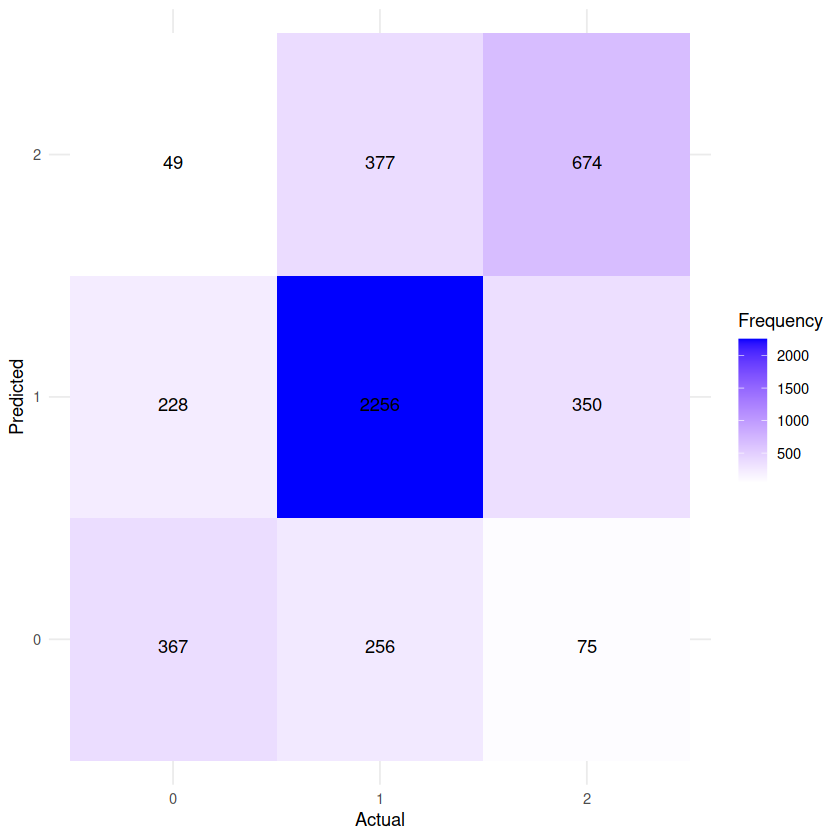

In [32]:
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)

In [33]:
#remotes::install_version("DMwR", version="0.4.1")

In [34]:

#install.packages("smotefamily")


In [3]:
suppressWarnings(min(data))

[1] 0

In [4]:
table(data$Credit_Score_Encoded)



    0     1     2 
 4295 19262  7333 

In [10]:
library(DMwR)
data$Credit_Score_Encoded <- as.factor(data$Credit_Score_Encoded)
# Original class counts
class_counts <- c(4295, 19262, 7333)

# Calculate the target count as the average of the original class counts
target_count <- sum(class_counts) %/% length(class_counts)

# Apply over-sampling using SMOTE
over_smote <- SMOTE(Credit_Score_Encoded ~ ., data = data, perc.over = 200, perc.under = 200, k = 5)


# Check the class distribution after sampling
table(over_smote$Credit_Score_Encoded)


    0     1     2 
12885 12502  4678 

In [38]:
library(randomForest)
library(DMwR)

set.seed(77)
confusion_matrix <- confusionMatrix


dim(data)

str(data)

data$Credit_Score_Encoded <- as.factor(data$Credit_Score_Encoded)


smote_data <- SMOTE(Credit_Score_Encoded ~ ., data = data,k = 5,  perc.over = 800, perc.under = 200)

dim(smote_data)


str(smote_data)

table(smote_data$Credit_Score_Encoded)


[1] 30890    18

'data.frame':	30890 obs. of  18 variables:
 $ Annual_Income               : num  19114 19114 19114 19114 34848 ...
 $ Num_Bank_Accounts           : int  3 3 3 3 2 2 2 2 2 2 ...
 $ Num_Credit_Card             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate               : int  3 3 3 3 6 6 6 6 6 6 ...
 $ Num_of_Loan                 : int  4 4 4 4 1 1 1 1 1 1 ...
 $ Delay_from_due_date         : int  5 6 3 3 7 3 3 3 3 3 ...
 $ Num_of_Delayed_Payment      : int  4 0 8 6 1 3 1 0 4 4 ...
 $ Changed_Credit_Limit        : num  6.27 11.27 11.27 11.27 7.42 ...
 $ Num_Credit_Inquiries        : num  4 4 4 4 2 2 2 2 2 2 ...
 $ Outstanding_Debt            : num  810 810 810 810 605 ...
 $ Total_EMI_per_month         : num  49.6 49.6 49.6 49.6 18.8 ...
 $ Credit_History_Age_Months   : int  268 269 271 0 320 322 323 324 325 326 ...
 $ Credit_Score_Encoded        : Factor w/ 3 levels "0","1","2": 3 3 3 2 3 3 3 3 3 3 ...
 $ Credit_Mix_Encoded          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Total_Num_Accounts

[1] 107375     18

'data.frame':	107375 obs. of  18 variables:
 $ Annual_Income               : num  32020 21709 83245 118884 40760 ...
 $ Num_Bank_Accounts           : num  4 3 2 5 4 2 4 7 6 4 ...
 $ Num_Credit_Card             : num  5 4 3 6 5 6 5 7 5 3 ...
 $ Interest_Rate               : num  7 8 8 8 19 12 1 6 7 12 ...
 $ Num_of_Loan                 : num  3 0 1 0 2 2 0 4 2 1 ...
 $ Delay_from_due_date         : num  20 8 7 14 10 7 0 27 23 15 ...
 $ Num_of_Delayed_Payment      : num  14 0 5 3 10 3 10 18 12 8 ...
 $ Changed_Credit_Limit        : num  1.79 11.52 5.47 11.29 19.66 ...
 $ Num_Credit_Inquiries        : num  1 7 9 3 9 4 0 0 9 1 ...
 $ Outstanding_Debt            : num  776 1047 1229 831 338 ...
 $ Total_EMI_per_month         : num  41.8 0 67.7 0 39.7 ...
 $ Credit_History_Age_Months   : num  206 292 252 255 377 326 192 242 344 253 ...
 $ Credit_Score_Encoded        : Factor w/ 3 levels "0","1","2": 3 3 2 2 3 2 2 2 2 2 ...
 $ Credit_Mix_Encoded          : num  2 2 2 2 1 2 2 1 1 1 ...
 $ Tota


    0     1     2 
38655 49644 19076 

In [40]:
library(data.table)
fwrite(smote_data, file = "smote.csv", sep = ",", quote = FALSE)

In [41]:
library(randomForest)
library(caret)

X <- smote_data[, !(names(smote_data) %in% c("Credit_Score_Encoded"))]
y <- as.factor(smote_data$Credit_Score)  


set.seed(77)  # Set random seed
set.seed(42) 
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [42]:
rf_model <- randomForest(y_train ~ ., data = data.frame(cbind(X_train, y_train)), ntree = 500)
saveRDS(rf_model, file = "../../models/v2_smote_model.rds")

In [43]:
loaded_model <- readRDS(file = "../../models/smote_model.rds")
predictions <- predict(rf_model, newdata = X_test)


confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0 7555  107    6
         1  170 9624  158
         2    6  197 3651

Overall Statistics
                                          
               Accuracy : 0.97            
                 95% CI : (0.9676, 0.9723)
    No Information Rate : 0.4623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.952           
                                          
 Mcnemar's Test P-Value : 0.0003287       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.9772   0.9694   0.9570
Specificity            0.9918   0.9716   0.9885
Pos Pred Value         0.9853   0.9670   0.9473
Neg Pred Value         0.9873   0.9736   0.9907
Prevalence             0.3600   0.4623   0.1777
Detection Rate         0.3518   0.4482   0.1700
Detection Prevalence   0.3571   0.4634   0.1795
Balanced Accuracy      0.9845

In [44]:
# Assuming the necessary libraries are loaded and the variables are defined

# Load the saved model
loaded_model <- readRDS(file = "../../models/smote_model.rds")

# Make predictions using the loaded model
predictions <- predict(loaded_model, newdata = X_test)

# Generate the confusion matrix
confusion_matrix <- confusionMatrix(predictions, y_test)

# Extract TP, TN, FP, FN from the confusion matrix
TP <- confusion_matrix$table[2, 2]  # True Positives
TN <- confusion_matrix$table[1, 1]  # True Negatives
FP <- confusion_matrix$table[1, 2]  # False Positives
FN <- confusion_matrix$table[2, 1]  # False Negatives

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix$table)) / sum(confusion_matrix$table)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
f1_score <- 2 * ((precision * recall) / (precision + recall))

# Calculate specificity
specificity <- TN / (TN + FP)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")
cat("Specificity:", specificity, "\n")


Accuracy: 0.9700102 
Precision: 0.9890042 
Recall (Sensitivity): 0.9826424 
F1 Score: 0.9858131 
Specificity: 0.986035 


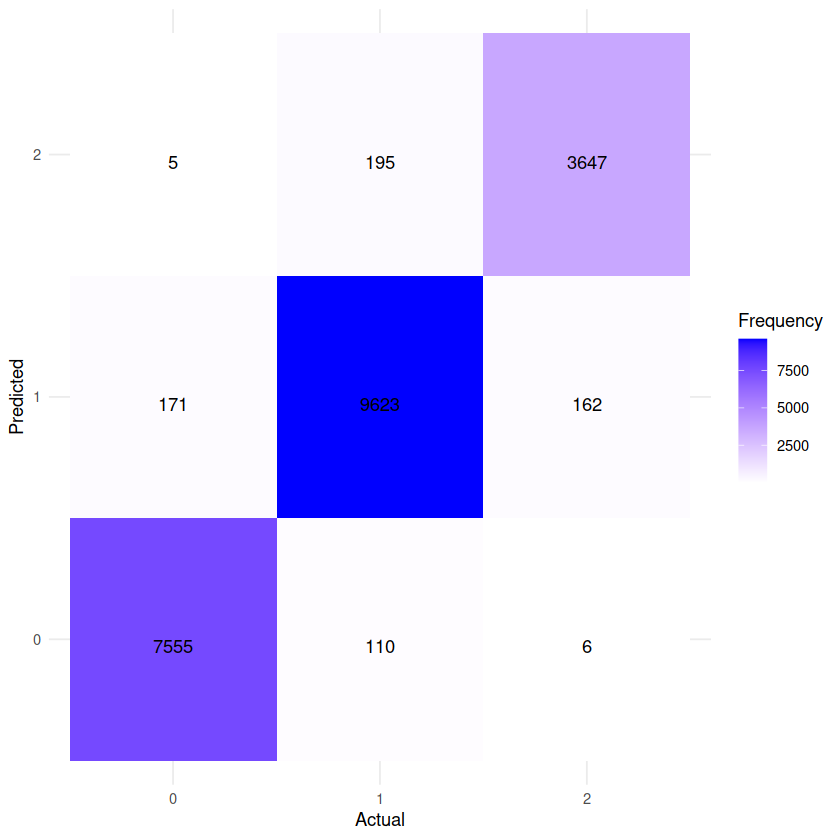

In [ ]:
# Visualize the confusion matrix
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)